# Simulation of the Brownian Bridge in Python

# Simulation of the Brownian Bridge

This project implements two numerical constructions of the Brownian bridge on the interval [0,1]:

1. Construction via Cholesky decomposition of the covariance matrix.
2. Construction via transformation of Brownian motion using  
   U_t = B_t - t B_1.

The simulations illustrate the covariance structure and the boundary condition U_0 = U_1 = 0.

## Mathematical Background

The Brownian bridge (U_t) on [0,1] is a centered Gaussian process with covariance

$$
\text{Cov}(U_s, U_t) = \min(s,t) - st.
$$

It satisfies the boundary conditions

$$
U_0 = 0, \quad U_1 = 0.
$$

It can be constructed either directly from its covariance matrix
or from Brownian motion via

$$
U_t = B_t - tB_1.
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## (a) Brownian bridge via Cholesky decomposition of covariance matrix
We simulate (U_t) on t = j/100, j=0,...,100 with U_0 = U_1 = 0.
Cov(U_s, U_t) = min(s,t) - st.

Covariance matrix Σ (size): (99, 99)
[[9.90e-03 9.80e-03 9.70e-03 ... 3.00e-04 2.00e-04 1.00e-04]
 [9.80e-03 1.96e-02 1.94e-02 ... 6.00e-04 4.00e-04 2.00e-04]
 [9.70e-03 1.94e-02 2.91e-02 ... 9.00e-04 6.00e-04 3.00e-04]
 ...
 [3.00e-04 6.00e-04 9.00e-04 ... 2.91e-02 1.94e-02 9.70e-03]
 [2.00e-04 4.00e-04 6.00e-04 ... 1.94e-02 1.96e-02 9.80e-03]
 [1.00e-04 2.00e-04 3.00e-04 ... 9.70e-03 9.80e-03 9.90e-03]]


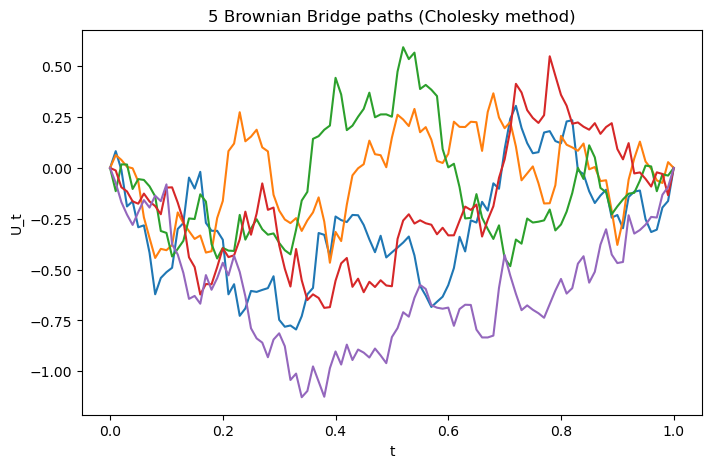

In [2]:
n = 100
dt = 1/n

# interior times 1/100,...,99/100 (since U0=0 and U1=0)
t_inner = np.arange(1, n) / n

# covariance matrix Sigma (99x99)
Sigma = np.zeros((n-1, n-1))
for i in range(n-1):
    for j in range(n-1):
        s = t_inner[i]
        t = t_inner[j]
        Sigma[i, j] = min(s, t) - s*t

print("Covariance matrix Σ (size):", Sigma.shape)
print(Sigma)

# Cholesky
A = np.linalg.cholesky(Sigma)

# 5 paths
Z = np.random.standard_normal((n-1, 5))
X = A @ Z

# add U0=0 and U1=0
Y = np.vstack([np.zeros((1,5)), X, np.zeros((1,5))])
U = Y.T  # 5 x 101

# plot
x = np.linspace(0, 1, n+1)
plt.figure(figsize=(8,5))
for i in range(5):
    plt.plot(x, U[i])
plt.title("5 Brownian Bridge paths (Cholesky method)")
plt.xlabel("t")
plt.ylabel("U_t")
plt.show()

**Discussion.** The simulated paths start at 0 and end at 0, as expected for a Brownian bridge.
The fluctuations are larger near the middle of the interval.
This matches the theoretical covariance structure:
Var(U_t) = t(1-t), which is maximal at t = 0.5.

## (b) Brownian bridge via U_t = B_t - t B_1
We first simulate Brownian motion and then transform it into a bridge.

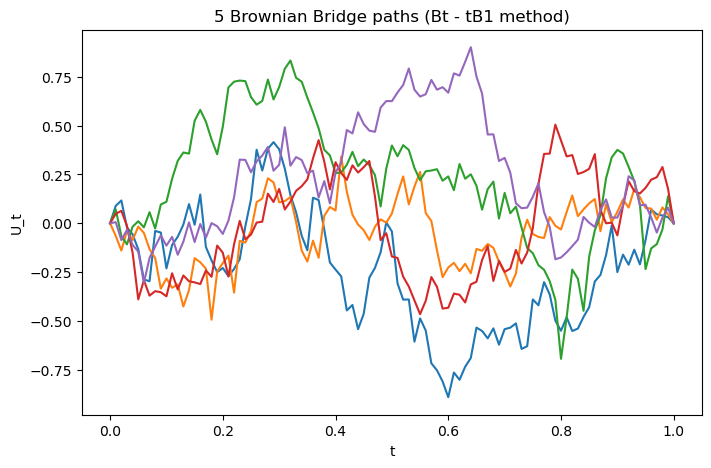

In [3]:
def brownian(n, dt):
    increments = np.sqrt(dt) * np.random.randn(n)
    B = np.zeros(n+1)
    B[1:] = np.cumsum(increments)
    return B

paths = []
x = np.linspace(0, 1, n+1)

for k in range(5):
    B = brownian(n, dt)
    U2 = B - x * B[-1]   # bridge
    paths.append(U2)

plt.figure(figsize=(8,5))
for k in range(5):
    plt.plot(x, paths[k])
plt.title("5 Brownian Bridge paths (Bt - tB1 method)")
plt.xlabel("t")
plt.ylabel("U_t")
plt.show()

**Discussion.** The transformation U_t = B_t - tB_1 produces a Brownian bridge.
This method is simpler since it avoids computing the covariance matrix.
Both constructions produce Gaussian processes with the same covariance structure,
hence they define the same Brownian bridge in distribution.

## (c) Compare one path from (a) and (b) using the same randomness
We use np.random.seed to reuse the same Gaussian sample.

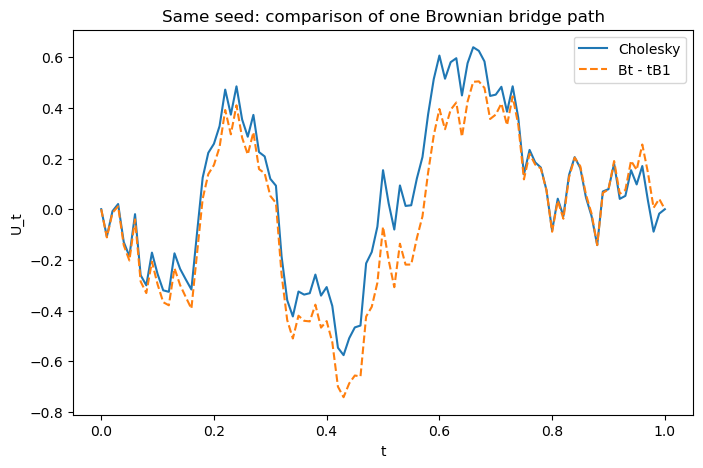

In [4]:
np.random.seed(123)

# (a) one path via Cholesky
Z = np.random.standard_normal(n-1)
U_inner = A @ Z
U_a = np.zeros(n+1)
U_a[1:n] = U_inner

np.random.seed(123)

# (b) one path via Bt - tB1
B = brownian(n, dt)
U_b = B - x * B[-1]

plt.figure(figsize=(8,5))
plt.plot(x, U_a, label="Cholesky")
plt.plot(x, U_b, linestyle="--", label="Bt - tB1")
plt.title("Same seed: comparison of one Brownian bridge path")
plt.xlabel("t")
plt.ylabel("U_t")
plt.legend()
plt.show()

**Discussion (c).** 
Using the same random seed does not produce identical paths.
This is because the Gaussian random variables are used differently in the two constructions:
the Cholesky method generates the full Gaussian vector with the correct covariance,
while the method \(U_t = B_t - tB_1\) builds a Brownian motion increment by increment and then transforms it.
However, both paths start at 0, end at 0, and exhibit similar fluctuations,
which confirms that they have the same distribution.

## Conclusion

Both constructions generate Gaussian processes with identical covariance structure and boundary conditions.

Although individual simulated paths differ numerically, they represent the same Brownian bridge in distribution.

This illustrates how stochastic processes can be constructed either through covariance structure or transformation of simpler processes.